<center>
    <img src="https://github.com/GuitarsAI/MRSP_Notebooks/blob/master/images/msp_header.png?raw=1">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Low Delay Filter Banks

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/MFbMI5yoaOk?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

Last time we saw that an MDCT type filter bank leads to an algorithmic delay of $z^{−1}$ in the lower sampling rate, hence a delay of one block, over the analysis and also synthesis filter bank. (Remember: the $z^{−1}$ came from making the inverse delay matrix D(z) causal).

In addition to this one block, we usually also need to take into account the so-called **blocking delay**, which results from assembling our incoming samples into blocks of length N. We first have to wait for N-1 incoming samples on the analysis side, and at the arrival of the N'th sample the block is full, and we can send it immediately to further processing. Hence the blocking delay is **N-1 samples**. Observe that we have no blocking delay on the synthesis side.

This means the total delay is both, this blocking delay, plus the delay resulting from our matrices.

In the case of our MDCT type filter bank, the total delay or so-called system delay is our blocking delay of N-1 samples plus 1 block delay from the polyphase matrices:

$$\large
n_d = N - 1 + N = 2N -1$$

We also have the length of our filter L=2N , which results in the system delay to be the length of the filters minus 1:

$$\large
n_d=L-1$$

This relation holds in **general for para-unitary filter banks!**

Observe that mathematically it only makes sense to **define a delay over the entire analysis and synthesis filter bank**, because here we have the exact same signal as the input signal, just delayed.

After only the analysis, we only have subband signals, which look diferently and have a different sampling rate. Hence, here we
cannot really define a delay.

For para-unitary filter banks, the only possibility to reduce the system delay is to reduce the filter length. But this also degrades the filter characteristics, for instance, it would lead to reduced stopband attenuation.

Often, in applications like real-time audio communications, it is desirable to have a lower end-to-end delay, but also good filters with high stopband attenuation, such that we still obtain a good coding or compression performance.


In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/8TVTMptxlQ8?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

There the solution are the so-called **Low-Delay Filter Banks.**

With them, it is possible to reduce the system delay without reducing the filter length L. How does this work? Or first, how do we get longer filters than the MDCT type filter banks in the first place? For MDCT type filter banks, we only had filters of length L=2N. How do we make them longer?

To see a solution, we first need to take a look at the polyphase matrix again, this time for filters of arbitrary length (more than 2N).

We can again compute our folding matrix of it, using:

$$\large
F_a \cdot D(z) = H(z) \cdot T^{-1}$$

as for the MDCT type filter banks, just that now our analysis polyphase matrix H(z) can contain baseband impulse responses $h_a(n)$ with arbitrary length L (and L can be much larger than 2N here).

The resulting form of the analysis folding matrix is the same as for the MDCT type filter banks, but with higher degree polynomials in it, as expected:

$$\large
F_a(z) = \\
\large
\begin{equation}
\left[
    \begin{array}{cccccc}
    . & 0 & -H_{2N-1}^{\downarrow 2N}\left(-z^2\right)\cdot z^{-1} &
    -H_{N-1}^{\downarrow 2N}\left(-z^2\right)\cdot z^{-1} & 0 & . \\
    . & . & 0 & 0 & . & . \\
    -H_{1.5N}^{\downarrow 2N}\left(-z^2\right)\cdot z^{-1} & 0 & . &
    . & 0 & -H_{\frac{N}{2}}^{\downarrow 2N}\left(-z^2\right) \\
    -H_{1.5N-1}^{\downarrow 2N}\left(-z^2\right)\cdot z^{-1} & 0 & . &
    . & 0 & H_{\frac{N}{2}-1}^{\downarrow 2N}\left(-z^2\right) \\
    0 & . & 0 & . & . & 0 \\
    . & 0 & -H_{N}^{\downarrow 2N}\left(-z^2\right)\cdot z^{-1} &
    H_{0}^{\downarrow 2N}\left(-z^2\right) & 0 & . \\
    \end{array}
\right]
\end{equation}
$$

with

$$\begin{equation}
\large
H_{n}^{\downarrow 2N}(z) := \sum_{m=0}^{\infty}h_a(m2N+n)\cdot z^{-m}
\end{equation}$$

which are the z-transforms of the downsampled by 2N versions of our baseband prototype $h_a$ for the analysis at phases *n*. The minus sign in $−z^2$ results from our cosine modulation function changing its sign every $2^{nd}$ block.

<br>
<cite>
(eq: 2) (From: G. Schuller, MJT. Smith: “New Framework for Perfect Reconstruction Fiiter Banks”, IEEE Transactions on Signal Processing, Aug. 1996).
</cite>

**Observe** that this $F_a(z)$ corresponds to our $F_a \cdot D(z)$.

**Observe** that the order of the polyphase polynomials determines the resulting filter length of our filter bank. If the highest exponent is M, then our filters have length M+1 blocks (of 2N here since we the have downsampling of 2N), or length (M+1)2N.

Here we can observe 2 effects:
 - One is that the shape of our analysis folding matrix has again the diamond shape.
 - Second, the poiynomials in it now have a higher order, depending on the length of our filters.

For the MDCT type with L=2N we still get an easy solution here, but what about longer filters? Our Goal is still to obtain a perfect reconstruction, and also to obtain Finite Impuise Response filters for our synthesis, to make it easier to handle.

The **approach** now is to use our previous matrix decomposition, writing our polyphase matrices as a product of simpler matrices, and simply extend this product with additional matrices, such that we:
 - keep the diamond shape of our resulting folding matrix intact (because this was the result of our cosine modulation, which we would like to keep intact),
 - that we increase the polynomial order and hence the resulting filter length,
 - such that we get easy FIR inverses,
 - and such we can control the resulting system delay.

The trick now is to invent additional matrices which fulfill these requirements.

These additional matrices can be split into separate types. The first type is the so-called **Zero-Delay Matrix:**

$$\large
E_i(z) =
\left[
    \begin{array}{cccccc}
    0 & . & . & . & 0 & 1 \\
    . & . & . & 0 & 1 & 0 \\
    . & \cdots & 0 & 1 & 0 & . \\
    . & 0 & 1 & e_0^i z^{-1} & 0 & . \\
    0 & 1 & 0 & . & . & 0 \\
    1 & 0 & . & . & . & e_{\frac{N}{2}-1}^i z^{-1} \\
    \end{array}
\right]
$$

It has an inverse, which is already causal, we don't need a delay to make it causal!:

$$\large
E_i^{-1}(z) =
\left[
    \begin{array}{cccccc}
    -e_{\frac{N}{2}-1}^i z^{-1} & . & . & . & 0 & 1 \\
    . & . & . & 0 & 1 & 0 \\
    . & . & -e_0^i z^{-1} & 1 & 0 & . \\
    . & 0 & 1 & 0 & . & . \\
    0 & 1 & 0 & . & . & 0 \\
    1 & 0 & . & . & . & 0 \\
    \end{array}
\right]
$$

In sympy, with N = 4 and $[e_0,e_1]$:

In [ ]:
from sympy import *
from numpy import *

z=symbols('z')

#Coefficients
e=symbols('e:2')

#The zero-delay E matrix:
E=Matrix([[0, 0, 0, 1],[0, 0, 1, 0],[0, 1, e[0]*z**(-1), 0], [1, 0, 0,e[1]*z**(-1) ]])
E

Matrix([
[0, 0,    0,    1],
[0, 0,    1,    0],
[0, 1, e0/z,    0],
[1, 0,    0, e1/z]])

Then its inverse is:

In [ ]:
E**(-1)

Matrix([
[-e1/z,     0, 0, 1],
[    0, -e0/z, 1, 0],
[    0,     1, 0, 0],
[    1,     0, 0, 0]])

we see that this is indeed the form as above.

We can now multiply our analysis polyphase folding matrix (1) with this zero-delay matrix, and get polynomials of higher order, because we have elements with $z^{-1}$ in it. The synthesis polyphase matrix is multiplied by this inverse, to still obtain perfect reconstruction.

Since the inverse also has polynomials of degree 1, it is still FIR. Also, since the inverse is already causal, we don't need any multiplication with $z^{-1}$ to make it causal, and hence no additional delay. This means, if we use this matrix, we can **increase the filter length**, but **don't increase the delay!**

In principle we can repeat this process as often as we like, and get **arbitrarily high filter lengths**, but **no increase in delay!** Zero-delay matrices **increase the filter length by 1 block, but don't increase the system delay.**

We increase the filter length by 1 block because the increase of the order of the polynomials by one which corresponds to 1 block.

There is a second type with the same properties, where we simply use the other half of the diagonal:

$$\large
G_i(z) =
\left[
    \begin{array}{cccccc}
    g_0^1 \cdot z^{-1} & . & . & . & 0 & 1 \\
    . & . & . & 0 & 1 & 0 \\
    . & . & g_{\frac{N}{2}}^i \cdot z^{-1} & 1 & 0 & . \\
    . & 0 & 1 & 0 & . & . \\
    0 & 1 & 0 & . & . & 0 \\
    1 & 0 & . & . & . & 0 \\
    \end{array}
\right]
$$

Its (causal) inverse is:

$$\large
G_i^{-1}(z) =
\left[
    \begin{array}{cccccc}
    0 & . & . & . & 0 & 1 \\
    . & . & . & 0 & 1 & 0 \\
    . & . & 0 & 1 & 0 & . \\
    . & 0 & 1 & -g_{\frac{N}{2}-1}^i z^{-1} & . \\
    0 & 1 & 0 & . & . & 0 \\
    1 & 0 & . & . & . & -g_0^1 \cdot z^{-1} \\
    \end{array}
\right]
$$

**Observe:** Contrary to diagonal matrices, where we needed to take the inverse of each element of the diagonal, here we obtain the inverse by flipping the diagonal half and flipping just the sign, which keeps it causal!

## Python Sympy Example

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/LDGJtUd2uYs?rel=0" frameborder="0" allow="autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We would like to see how the product $H(z) = Fa \cdot D(z) \cdot G(z)$ of our folding matrix Fa(z) with the zero delay matrix G(z) looks like.

In [ ]:
from sympy import *

z=symbols('z')
g=symbols('g:2')
h=symbols('h:8')

Fa=Matrix([[0, -h[7], -h[3], 0],[-h[6], 0, 0, -h[2]],[-h[5], 0, 0, h[1]],[0, -h[4], h[0], 0]])
D=Matrix([[z**(-1), 0, 0, 0],[0, z**(-1), 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]])
G=Matrix([[g[0]*z**(-1), 0, 0, 1],[0, g[1]*z**(-1), 1, 0],[0, 1, 0, 0],[1, 0, 0,0 ]])
print("Fa=")
display(Fa)
print("D(z)=")
display(D)
print("G=")
display(G)
print("Fa*D*G =")
display(Fa*D*G)

Fa=


Matrix([
[  0, -h7, -h3,   0],
[-h6,   0,   0, -h2],
[-h5,   0,   0,  h1],
[  0, -h4,  h0,   0]])

D(z)=


Matrix([
[1/z,   0, 0, 0],
[  0, 1/z, 0, 0],
[  0,   0, 1, 0],
[  0,   0, 0, 1]])

G=


Matrix([
[g0/z,    0, 0, 1],
[   0, g1/z, 1, 0],
[   0,    1, 0, 0],
[   1,    0, 0, 0]])

Fa*D*G =


Matrix([
[               0, -g1*h7/z**2 - h3, -h7/z,     0],
[-g0*h6/z**2 - h2,                0,     0, -h6/z],
[-g0*h5/z**2 + h1,                0,     0, -h5/z],
[               0, -g1*h4/z**2 + h0, -h4/z,     0]])

We can see that this is indeed the diamond shaped form of equation (1). By comparing it with eq. (1) we could now read out the resulting final baseband prototype filter for the anliysis $h_a(n)$.

Observe that eq. (1) is for an even number of zero-Delay matrices. For odd numbers, as in this example, we would need to flip the matrix in eq. (1) horizontally (fliplr).

So now we don't specify $h_a$ in our design process, but we start with our coefficients for our matrices, and obtain a baseband prototype filter $h_a$ with the desired length and delay properties.


**Q:** What is a possible drawback of these zero delay matrices?

**A:** If we only increase the filter length with our zero delay matrices, we can observe that the far off **attenuation increases easily**, a **clear improvement** over the MDCT case. But the **nearby attenuation**, to the neighboring subbands, increases not as much as for orthogonal fiter banks with **similar length but with more delay.**

Hence it can make sense to also increase the system delay, to obtain filters with higher near by attenuation more easily. This leads us to a matrix, which is very efficient in increasing the system delay, the opposite of zero-delay matrices:

The so-called **Maximum-Delay Matrices.** They basically result from exchanging $z^{-1}$ by z in our zero-delay matrices, and a multiplication with $z^{-1}$ to make them causal:

$$\large
H1(z) :=z^{-1} \cdot E(z^{-1})$$

This is one type of matrix, each matrix in our cascade has its own coefficients.

The other type is:
$$\large
H2(z) :=z^{-1} \cdot G(z^{-1})$$

Their inverse need a multiplication with $z^{−2}$ to make it causal, and is, correspondingly:

$$\large
H1^{-1}(z) \cdot z^{-2} = z^{-1} \cdot E(z^{-1})$$

and
$$\large
H2^{-1}(z) \cdot z^{-2} =z^{-1} \cdot G(z^{-1})$$

Here we can see that the matrix and its inverse leads to N blocks of delay:

$$\large
H1(z) \cdot H1^{-1}(z) \cdot z^{-2} = z^{-2}
$$

and

$$\large
H2(z) \cdot H2^{-1}(z) \cdot z^{-2} = z^{-2}
$$

Observe that the Maximum-Delay matrices have a polynomial order of 1, just like the zero-delay matrices, and hence **increase the filter length by 1 block, but increase the delay by 2 blocks!** This is twice as much as for an orthogonal filter bank.

Using only maximum-delay matrices would result in similar frequency responses as with only zero-delay matrices, the impulse response would only appear time-reversed. We get increased nearby attenuation only if we **mix both types** of matrices. Orthogonal filter banks can be obtained if we use the same number of Maximum-delay and Zero-delay matrices.

Our resulting polyphase matrix for the analysis then becomes this product:

$$\large
H(z) = F_a \cdot D(z) \cdot \prod_{n=0}^{P-1} G_n(z) \cdot \prod_{m=0}^{Q-1} H_m(z) \cdot T$$

where $H_m(z)$ is either H1(z) (if P is even) or H2(z), if P is odd.

For the synthesis polyphase matrix we get the inverse product:

$$\large
G(z) = H{-1}(z) \cdot z^{-(2Q+1)} \\
\large
= T^{-1} \prod_{m=Q-1}^0 z^{-2} \cdot H_m^{-1}(z) \prod_{n=P-1}^0 G_n^{-1}(z) \cdot D^{-1}(z) \cdot z^{-1} \cdot F_a^{-1}
$$

Now we can design the impulse response length and the system delay of our filter bank. The **total number of our zero-delay and maximum-delay matrices determines the length of our impulse response.** Including the effect of the $F_a \cdot D(z)$ matrix (a length of N blocks), we obtain a total filter length of:

$$\large
L = (2+Q+P) \cdot N
$$

Just the number of **maximum-delay matrices** $H_m(z)$ determines the **system delay.** Including the effects of the $F_a \cdot D(z)$ matrix and the blocking delay (with a delay of 2N-1), we obtain a system delay of:

$$\large
n_d = 2N -1+2Q \cdot N$$

Each zero-delay and maximum-delay matrix increases the impulse response length by one block of N samples. Each maximum-delay matrix increases the system delay by N blocks (2N samples), in this case starting with the MDCT delay of 2N-1 samples. It is also possible to start with a lower delay than an MDCT, by setting the leading samples of the MDCT type part to zero.

**Observe:** We obtain the same **analysis and synthesis baseband impulse response,** if the determinants of our submatrices of our polyphase matrix are -1, as seen before.

If we look at the **zero-delay matrices**, we find that their determinant of the submatrices is already - 1 (very practical). If we look at the **maximum-delay matrices**, we see that their determinant of the submatrices is $−z^{−2}$ , which is their resulting delay contribution and a factor of -1, which has the same effect, of leading to the same analysis and synthesis impulse responses.

All we need to remain to do, is to make sure that the **matrix $\mathbf{F_a}$ has a determinant of -1** in their submatrices, to obtain identical analysis and synthesis baseband impulse responses. This means the number of unknown coefficients for the folding matrix $F_a$ is going down from $2N$ to $2N-\frac{N}{2}$. The remaining $\frac{N}{2}$ coefficients come out of the det=-1 condition.

This also makes the design easier, because then we only need to **optimize one side** of our filter bank, for instance the analysis side, and we have a reduced number of coefficients. We need a numerical optimization, because we now have a long cascade or product, with many unknown coefficients (in the Fa folding matrix, the Zero-Delay and Maximum-Delay matrices).

We need to optimize them such that we obtain a good frequency response for the resulting impulse response. We can use eq. (1) in this lecture and our product for the folding matrix $F_a(z)$ (without the transform matrix T), to **read out the resulting baseband impulse response $h_a(n)$.**

We can then compute the resulting frequency response and use that as a function to optimize, towards some "optimum" frequency response (for instance an ideal low pass filter as the prototype).

An example application of this type of fiter bank is the audio coder "Enhanced Low Delay AAC" (ELD-AAC) in MPEG-4. Here it is used to obtain a lower encoding/decoding delay.

## Python Fast Implementation Example

In [ ]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/4UWe3yQmWIs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

For Low Delay filter banks it is usefull to process the samples as they come from the sound card. Hence we need a different implementation, an implementation which is not based on the signal already in memory. To obtain it, we interpret the $z^{−1}$ as a delay by one sample, and implement it using a memory element, which stores or delays samples for 1 sampling interval.

The Delay Matrix D(z) for instance can e implemented as follows:

In [ ]:
import numpy as np

#The D(z) matrix:
def Dmatrix(samples):
#implementation of the delay matrix D(z)
    #Delay elements:
    out=np.zeros(N)
    out[0:(N/2)]=Dmatrix.z
    Dmatrix.z=samples[0:(N/2)]
    out[N/2:N]=samples[N/2:N]
    return out

A real time MDCT or Low Delay filter bank implementation, producing a waterfall spectrogram, including the synthesis filter bank and playback of the reconstructed signal, is in the following. To run it, dowload it as jupyter notebook file (*.ipynb) and run it locally with "jupyter notebook":

In [ ]:
# Imports and Configuration
%matplotlib notebook

import numpy as np
import scipy.signal as signal
import struct
import scipy.fftpack as spfft
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading
import cv2
import pyaudio

In [ ]:
# Signal Processing Parameters

N=512                          # Number of subbands and block size
CHUNK_SIZE = N                 # Blocksize
FORMAT = pyaudio.paInt16       # Conversion format for PyAudio stream
CHANNELS = 1                   # Audio Channels
RATE = 32000                   # Sampling Rate in Hz
FFT_LEN = N                    # FFT Length

rows=500
cols=CHUNK_SIZE
fftlen=cols
frame=0.0*np.ones((rows,cols,3));

NameError: ignored

In [ ]:
#The D(z) matrix:
def Dmatrix(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    out=np.zeros(N)
    out[0:int(N/2)]=Dmatrix.z
    Dmatrix.z=samples[0:int(N/2)]
    out[int(N/2):N]=samples[int(N/2):N]
    return out

Dmatrix.z=np.zeros(int(N/2))

In [ ]:
#The inverse D(z) matrix:
def Dmatrixinv(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    out=np.zeros(N)
    out[int(N/2):N]=Dmatrixinv.z
    Dmatrixinv.z=samples[int(N/2):N]
    out[0:int(N/2)]=samples[0:int(N/2)]
    return out

Dmatrixinv.z=np.zeros(int(N/2))

In [ ]:
#The F Matrix:
fcoeff=np.sin(np.pi/(2*N)*(np.arange(0,2*N)+0.5))
Fmatrix=np.zeros((N,N))
Fmatrix[0:int(N/2),0:int(N/2)]=np.fliplr(np.diag(fcoeff[0:int(N/2)]))
Fmatrix[int(N/2):N,0:int(N/2)]=np.diag(fcoeff[int(N/2):N])
Fmatrix[0:int(N/2),int(N/2):N]=np.diag(fcoeff[N:int(N+N/2)])
Fmatrix[int(N/2):N,int(N/2):N]=-np.fliplr(np.diag(fcoeff[int(N+N/2):(2*N)]))

In [ ]:
#The inverse F matrix:
Finv=np.linalg.inv(Fmatrix)

In [ ]:
#The DCT4 transform:
def DCT4(samples):
    #use a DCT3 to implement a DCT4:
    samplesup=np.zeros(2*N)
    #upsample signal:
    samplesup[1::2]=samples
    y=spfft.dct(samplesup,type=3)/2
    return y[0:N]

In [ ]:
#The complete MDCT, Analysis:
def MDCT(samples):
    y=np.dot(samples,Fmatrix)
    y=Dmatrix(y)
    y=DCT4(y)
    return y

In [ ]:
#The inverse MDCT, synthesis:
def MDCTinv(y):
    #inverse DCT4 is identical to DCT4:
    x=DCT4(y)*2/N
    #inverse D(z) matrix
    x=Dmatrixinv(x)
    #inverse F matrix
    x=np.dot(x,Finv)
    return x

In [ ]:
# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        cv2.destroyAllWindows()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

In [ ]:
# Function to Plot MDCT

def run_mdct(toggle_run):
    while(True):
        if toggle_run.value==True:
            break

        #Reading from audio input stream into data with block length "CHUNK":
        data = stream.read(CHUNK_SIZE)
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data ));
        samples=np.array(list(shorts),dtype=float);

        #shift "frame" 1 up:
        frame[0:(rows-1),:]=frame[1:rows,:];
        #compute magnitude of 1D FFT of sound
        #with suitable normalization for the display:
        #frame=np.abs(np.ffqt.fft2(frame[:,:,1]/255.0))/512.0
        #write magnitude spectrum in lowes row of "frame":
        #R=0.25*np.log((np.abs(np.fft.fft(samples[0:fftlen])[0:(fftlen/2)]/np.sqrt(fftlen))+1))/np.log(10.0)

        #This is the FFT of the input:
        #y=np.fft.fft(samples[0:fftlen])
        #This is the analysis MDCT of the input:
        y=MDCT(samples[0:fftlen])

        #yfilt is the processed subbands, processing goes here:
        yfilt=y
        #yfilt=np.zeros(N)
        #yfilt[10:150]=y[10:150]
        #yfilt[1]=y[1]*8
        #yfilt[0:1024]=y[0:1024]

        #Waterfall color mapping:
        R=0.25*np.log((np.abs(yfilt/np.sqrt(fftlen))+1))/np.log(10.0)
        #Red frame:
        frame[rows-1,:,2]=R
        #Green frame:
        frame[rows-1,:,1]=np.abs(1-2*R)
        #Blue frame:
        frame[rows-1,:,0]=1.0-R
        #frame[rows-1,:,0]=frame[rows-1,:,1]**3
        # Display the resulting frame
        cv2.imshow('frame',frame)

        #Inverse FFT:
        #xrek=np.real(np.fft.ifft(yfilt))
        #Inverse/synthesis MDCT:
        xrek=MDCTinv(yfilt).astype(int);
        xrek=np.clip(xrek, -32000,32000)
        #converting from short integers to a stream of bytes in "data":
        #data=struct.pack('h' * len(samples), *samples);
        data=struct.pack('h' * len(xrek), *xrek);
        #Writing data back to audio output stream:
        stream.write(data, CHUNK_SIZE)

        #Keep window open until key 'q' is pressed:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    cv2.destroyAllWindows()


In [ ]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_mdct, args=(toggle_run,))

In [ ]:
# Start Audio Stream
# Create
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)

In [ ]:
# Initialize Plot and Display GUI

display(box_buttons)



## The following is an implementation of our MDCT waterfall spectrogram for Colab.

In [6]:
!pip install sounddevice
!pip install ffmpeg-python
!pip install PySoundFile

!pip install soundfile
#!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#@title Recording audio from microphone, run this setup: {display-mode: "form"}
"""
From:
https://colab.research.google.com/gist/ricardodeazambuja/03ac98c31e87caf284f7b06286ebf7fd/microphone-to-numpy-array-from-your-browser-in-colab.ipynb
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""


from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg


AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [8]:
#Run this cell to record the audio:

import soundfile as sf

audio, sr = get_audio()
print("sampling rate=", sr)
sf.write('input.wav', audio, sr)

sampling rate= 48000


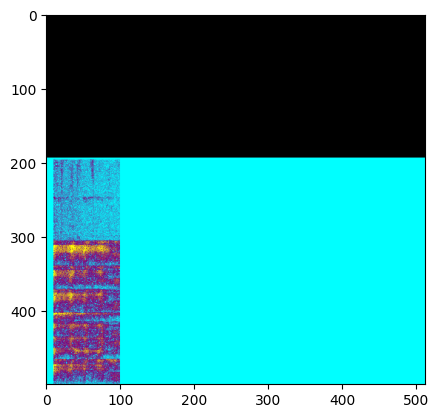

In [17]:
#@title MDCT Waterfall spectrogram
#import sounddevice as sd
import numpy as np
import cv2
import scipy.fftpack as spfft
import soundfile as sf
import IPython.display as ipd
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import matplotlib.pyplot as plt


N = 512  # Number of subbands and block size
CHUNK = N  # Blocksize
RATE = 32000  # Sampling Rate in Hz

# The D(z) matrix:
def Dmatrix(samples):
#implementation of the delay matrix D(z)
   #Delay elements:
   out=np.zeros(N)
   out[0:int(N/2)]=Dmatrix.z
   Dmatrix.z=samples[0:int(N/2)]
   out[int(N/2):N]=samples[int(N/2):N]
   return out

Dmatrix.z=np.zeros(int(N/2))

#The inverse D(z) matrix:
def Dmatrixinv(samples):
#implementation of the delay matrix D(z)
   #Delay elements:
   out=np.zeros(N)
   out[int(N/2):N]=Dmatrixinv.z
   Dmatrixinv.z=samples[int(N/2):N]
   out[0:int(N/2)]=samples[0:int(N/2)]
   return out

Dmatrixinv.z=np.zeros(int(N/2))

#The F Matrix:
fcoeff=np.sin(np.pi/(2*N)*(np.arange(0,2*N)+0.5))
Fmatrix=np.zeros((N,N))
Fmatrix[0:int(N/2),0:int(N/2)]=np.fliplr(np.diag(fcoeff[0:int(N/2)]))
Fmatrix[int(N/2):N,0:int(N/2)]=np.diag(fcoeff[int(N/2):N])
Fmatrix[0:int(N/2),int(N/2):N]=np.diag(fcoeff[N:int(N+N/2)])
Fmatrix[int(N/2):N,int(N/2):N]=-np.fliplr(np.diag(fcoeff[int(N+N/2):(2*N)]))

#The inverse F matrix:
Finv=np.linalg.inv(Fmatrix)

#The DCT4 transform:
def DCT4(samples):
   #use a DCT3 to implement a DCT4:
   samplesup=np.zeros(2*N)
   #upsample signal:
   samplesup[1::2]=samples
   y=spfft.dct(samplesup,type=3)/2
   return y[0:N]

#The complete MDCT, Analysis:
def MDCT(samples):
   y=np.dot(samples,Fmatrix)
   y=Dmatrix(y)
   y=DCT4(y)
   return y

#The inverse MDCT, synthesis:
def MDCTinv(y):
   #inverse DCT4 is identical to DCT4:
   x=DCT4(y)*2/N
   #inverse D(z) matrix
   x=Dmatrixinv(x)
   #inverse F matrix
   x=np.dot(x,Finv)
   return x



# Load audio file
filename = 'input.wav'
samples, sample_rate = sf.read(filename, dtype='float32')
samples = np.asarray(samples)
samples*=32000 #make it an 16 bit integer range, like from pyaudio

# Size of waterfall diagram
rows = 500
cols = CHUNK
fftlen = cols
frame = 0.0 * np.ones((rows, cols, 3))
playback=[]

for i in range(0, len(samples), CHUNK):
    # Extract audio chunk
    chunk = samples[i:i + CHUNK]

    # Shift "frame" 1 up
    frame[0:(rows - 1), :] = frame[1:rows, :]

    # Compute magnitude of 1D FFT of sound with suitable normalization for the display
    if chunk.shape[0]!=CHUNK:
        break
    y = MDCT(chunk)

    #yfilt is the processed subbands, processing goes here:
    #yfilt=y
    yfilt=np.zeros(N)
    yfilt[10:100]=y[10:100] #only keep subbands no 10 to 100, as a bandpass filter
    #yfilt[1]=y[1]*8
    #yfilt[0:1024]=y[0:1024]

    # Waterfall color mapping
    R = 0.25 * np.log((np.abs(yfilt / np.sqrt(fftlen)) + 1)) / np.log(10.0)

    # Red frame
    frame[rows - 1, :, 2] = R
    # Green frame
    frame[rows - 1, :, 1] = np.abs(1 - 2 * R)
    # Blue frame
    frame[rows - 1, :, 0] = 1.0 - R

    # Display the resulting frame
    if i%10 == 0:
        #output.clear()
        #cv2_imshow(frame*255)
        plt.imshow(np.flip(np.clip(frame, 0, 1), axis=2)) #reverse ordering of primary color dimension from OpenCV
        plt.show()
        #time.sleep(.2)
        clear_output(wait=True)


    # Inverse/synthesis MDCT
    xrek = MDCTinv(yfilt).astype(int)
    xrek = np.clip(xrek, -32000, 32000)

    playback=np.concatenate((playback,xrek))

sf.write('output.wav',playback/32000,sr) #normalize sound samples to range -1..+1

In [18]:
print("Reconstructed Audio")
ipd.Audio('output.wav', autoplay=True)

Reconstructed Audio
